In [1]:
## Import stuff
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

In [2]:
## Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data # matrix of dimensions 442x10
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [6]:
# train
X = diabetes_X_train
y = diabetes_y_train
y=y.reshape((-1,1))
# train: init
W = np.random.uniform(0,1,(np.size(X,1),1))
b = np.array(np.random.rand())
b=  b.reshape(1,1)
 
learning_rate = 0.01
epochs = 1000
 
# train: gradient descent
for i in range(epochs):
    # calculate predictions
    #implementing stocasticated gradient descent
    for j in range(np.size(X,0)):
        X_new=X[j,:].reshape((1,-1))
        y_predict=np.matmul(X_new,W)+b

        # calculate error and cost (mean squared error)
        mean_squared_error=np.sum(pow((y_predict-y[j]),2)/(2))

        # calculate gradients
        error=(y_predict-y[j])/(1)
        G=np.matmul(np.transpose(X_new),error)

        # update parameters
        W=W-(learning_rate)*G
        b=b-(learning_rate)*np.sum(error)
        # diagnostic output
    if i%100==0:
        print('mean_squared_error:',mean_squared_error)

mean_squared_error: 1444.0710319174186
mean_squared_error: 104.17234019148405
mean_squared_error: 166.12757272574873
mean_squared_error: 197.93699711882365
mean_squared_error: 208.61827549128068
mean_squared_error: 211.2677388313457
mean_squared_error: 211.32979751774533
mean_squared_error: 210.73437645600177
mean_squared_error: 210.08634269907597
mean_squared_error: 209.53301114416755


In [7]:
b

array([[153.92128479]])

In [9]:
# test
X = diabetes_X_test
y = diabetes_y_test
 
# calculate predictions + calculate error and cost (same code as above)
y_predict=np.matmul(X,W)+b
mean_squared_error=(np.sum((y_predict-y)**2)/(2*np.size(y,0)))
print('Coefficients: \n', W)
print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Coefficients: 
 [[   6.35284802]
 [-234.87385403]
 [ 514.57073589]
 [ 327.24266279]
 [ -98.52034624]
 [ -88.57724111]
 [-202.12182322]
 [ 117.69446459]
 [ 469.34156367]
 [  82.4704031 ]]
Mean squared error: 80610.17


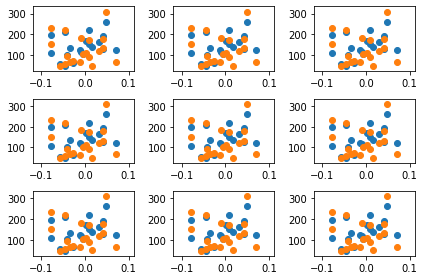

In [259]:
fig,axs=plt.subplots(3,3)
k=0
for i in range(3):
    for j in range(3):
        axs[i,j].scatter(X[:,k],y_predict)
        axs[i,j].scatter(X[:,k],y)
fig.tight_layout()